# ML Boot Camp Lesson 2
Copyright 2019

Author: Paul La Plante

License: BSD 2-clause

# My First Neural Network
We're going to start with a classic application of neural networks: classifying hand-written digits. This is the "hello world" of ML applications, and a good introduction for tying together a lot of different ML concepts. We'll be coding this up using Keras, and perform the training on our laptops.

Some of this material was taken from [this article on training a CNN with Keras](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5). Go there for more information if you're curious!

## Import Modules and Training Data
If you don't yet have Keras and TensorFlow installed on your machine, follow the instructions in the Installation notebook. Fortunately, a dataset of handwritten numbers is included with Keras, so there is no additional data we need to download. Let's get started!

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# download and split data into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualizing the Data
Let's take a look at some of the input data. The hand-written digits are two-dimensional 28 x 28 images with greyscale intensity values between 0 and 255. They are labeled with what the "right" answer is for training purposes.

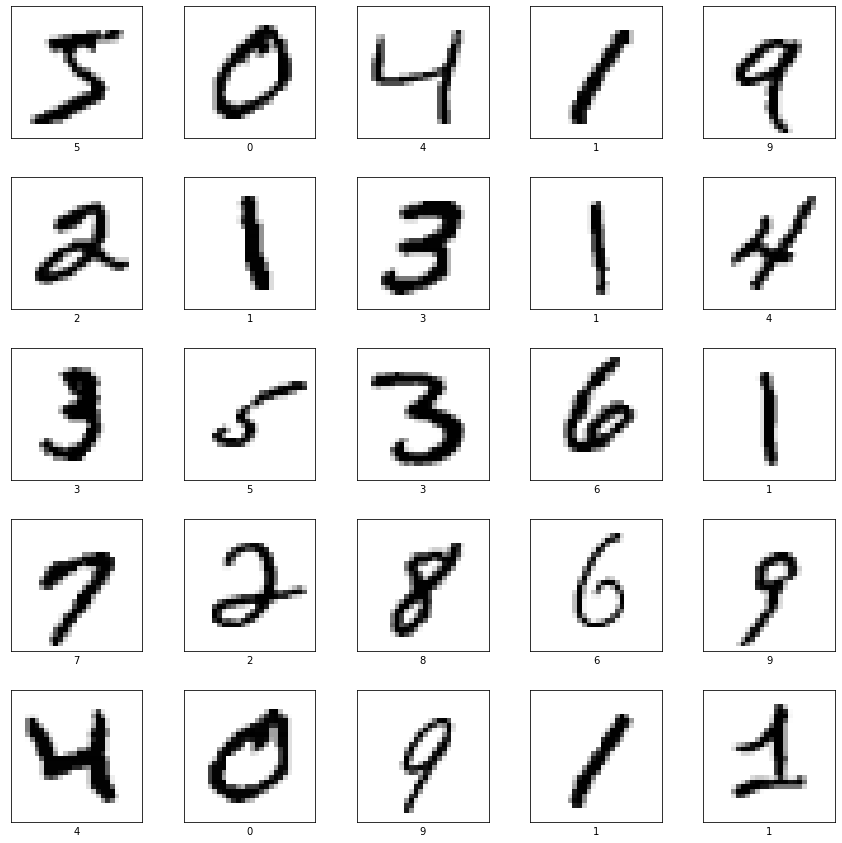

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# visualize different input images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

# Pre-processing the Data
Before we can send the data through the network, we need to make sure it's in the right shape. This particular dataset has 70,000 total images, with 60,000 in the training group and 10,000 in the testing group. As said above, each image is 28 x 28 pixels in size, and each pixel is a grayscale intensity value (i.e., there is only one color channel to the image). So we want to reshape the data into 3-dimensional tensors that are appropriate for the ML app to use.

As an additional pre-processing, we'll normalize all of the data to lie between 0 and 1. This is not always necessary, but it usually helps with training the network more quickly. Just make sure to pre-process the training and testing data in the same way!

In [3]:
# reshape and normalize the data
X_train = X_train.reshape(60000, 28, 28) / 255.0
X_test = X_test.reshape(10000, 28, 28) / 255.0

# Defining the Output
We're classifying each of the input images as a digit 0-9, so we'll use a _one-hot encoding_ scheme. This says that the input image should fall into only one output category. We can denote this encoding using a function in the Keras library. It will convert the answers we were printing above to vectors with a "1" for the right answer and a "0" for all other digits.

In [4]:
from tensorflow.keras.utils import to_categorical

# print what the labels looks like before
print("before: ", y_train[0])

# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# show what the output looks like now
print("after: ", y_train[0])

before:  5
after:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the Model
We are now ready to start building our model to train. We'll use one hidden layer before predicting on our categories. Later we'll add more layers and see if we can get better results.

We build our network using the `Sequential` function from Keras. We'll also import the layers we need to construct the model.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# create model
model = Sequential()

# add layers
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

Just a quick description of each of the layers:
1. The `Flatten` layer will convert the two dimensional (28 x 28) input image into a one dimensional (784) set of input neurons. There are no parameters to train for this layer--we're simply reshaping the input because we're not explicitly using the two-dimensional information present to help us (but that will change tomorrow!).
2. The `Dense` layer fully connects the input layer to the intermediate hidden layer. We've chosen to have 128 neurons in this layer (somewhat arbitrarily) and used a ReLU activation function.
3. The second `Dense` layer connects our hidden layer to the output layer. The `softmax` activation function will rescale all of the output values to sum to 1, so that we can (hand-wavingly) interpret the output values as probabilities for the input to be interpreted as belonging to the specified output category. The network then takes the largest value in the softmax layer as the "right" answer for evaluation purposes.

# Understanding the Model
Keras has some nice tools for understanding our ML models. Let's look at some samples below.

In [6]:
# print a summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


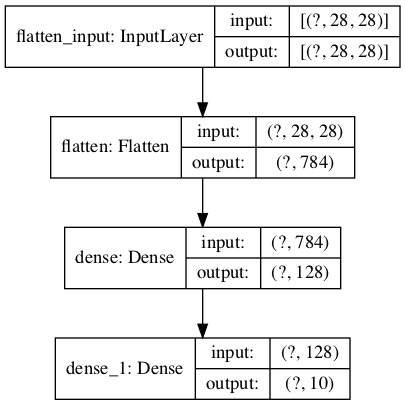

In [7]:
# Visualize the model with a diagram
# Note: you need to have pydot installed for this. You should `pip install pydot` if you get an error message.
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="images/model_plot.png", show_shapes=True, show_layer_names=True)

# Compiling the Model
Now that we've defined our model, we need to compile it. Compiling the model requires 3 ingredients: an optimizer, a loss function, and metrics.

In [8]:
# compile our model
model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

Some notes:
1. ADAM is a good general purpose optimizer that automatically adjusts the learning rate as it progresses. It's a safe first option to choose for most applications.
2. The "categorical crossentropy" loss function is the most common one for classification problems. For a regression problem (like the one we looked at yesterday), we'd choose something like the absolute error or square error. Because this loss function is already built into the Keras library, Keras knows how to handle differentiation and back-propagation efficiently for it.
3. The metrics define how to assess the performance of a model. They're similar to the loss function, but do not explicitly feed back into adjusting the model when training. We'll use `metrics=["accuracy"]` for any classification problem we tackle.

# Training the Model
Alright, we're now ready to train our model. We do this by calling the `fit` method on our `model` object. We pass the `fit` function our training data and labels, as well as the validation data to evaluate how good our model does. We also need to specify the number of epochs to train our network for. We'll use 3, but more epochs generally lead to better results (up to a certain point).

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 14s 236us/sample - loss: 0.2607 - accuracy: 0.9262 - val_loss: 0.1432 - val_accuracy: 0.9563
Epoch 2/3
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1116 - accuracy: 0.9671 - val_loss: 0.0947 - val_accuracy: 0.9713
Epoch 3/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.0860 - val_accuracy: 0.9739


Not bad! We've been able to achieve over 97% accuracy in our predictions!

# Making Predictions
Now that we have a trained neural network, we'd like to make predictions on new data. In our case, we've already shown all of the training and testing data we have too the machine, so there's no new data to truly test our predictions on. However, we'll still predict on the first few images of the training data, just to convince ourselves that it's working.

In [10]:
# predict on the first few images of the training dataset
model.predict(X_test[:4])

array([[9.0535917e-07, 1.3026719e-06, 5.4442673e-05, 3.7012689e-03,
        1.4145738e-08, 4.6708280e-07, 1.5272261e-10, 9.9618882e-01,
        1.5808451e-05, 3.7047168e-05],
       [1.1039039e-05, 7.0771063e-04, 9.9911195e-01, 1.5176572e-04,
        1.3080302e-12, 1.1718855e-05, 3.1463865e-06, 8.8486600e-11,
        2.6377418e-06, 2.0365912e-11],
       [2.2923966e-06, 9.9797517e-01, 2.1198009e-04, 9.5712485e-06,
        8.0995334e-05, 4.6813420e-05, 6.7392873e-05, 6.3886942e-04,
        9.3041826e-04, 3.6530160e-05],
       [9.9987400e-01, 1.4465780e-09, 2.1917862e-05, 2.4249675e-06,
        5.1959827e-08, 2.3386451e-06, 2.2049104e-05, 5.9908303e-05,
        2.6057560e-07, 1.7110457e-05]], dtype=float32)

In [11]:
# show the actual answers
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

We did it! Our network has successfully predicted the answer for these images.

# What went wrong?
It's natural to wonder why the neural network didn't achieve 100% accuracy. Here are some reasons why we shouldn't expect the neural network to be perfect:

## We purposely didn't overfit the data
When training the neural network, we want to be careful that we're not overfitting the training data. Using the analogy of curve fitting, we can _always_ fit $N$ points perfectly by using a polynomial of degree $(N-1)$. However, it doesn't always lead to a good fit outside of the explicit data points. We have a similar goal here: we purposely don't train the network to achieve 100% accuracy on the training dataset because we don't want the network to perform poorly on data that it hasn't seen before. This is a large motivation for why we have the testing dataset, which the network has purposely not encountered during the training phase, to accurately evaluate whether we're overfitting. We'll keep coming back to how we can convince ourselves that we haven't overfit the data, and why it's important to check this.

## Sometimes the Training Data is Not... Perfect
Let's take a peek at some of the examples that the trained network got wrong. We're not going to exhaustively look at all of them, but let's look at a few. We're going to predict on 1,000 entries of the training data (so we'd expect ~25 to be wrong, given our overall accuracy), and find the ones that don't agree.

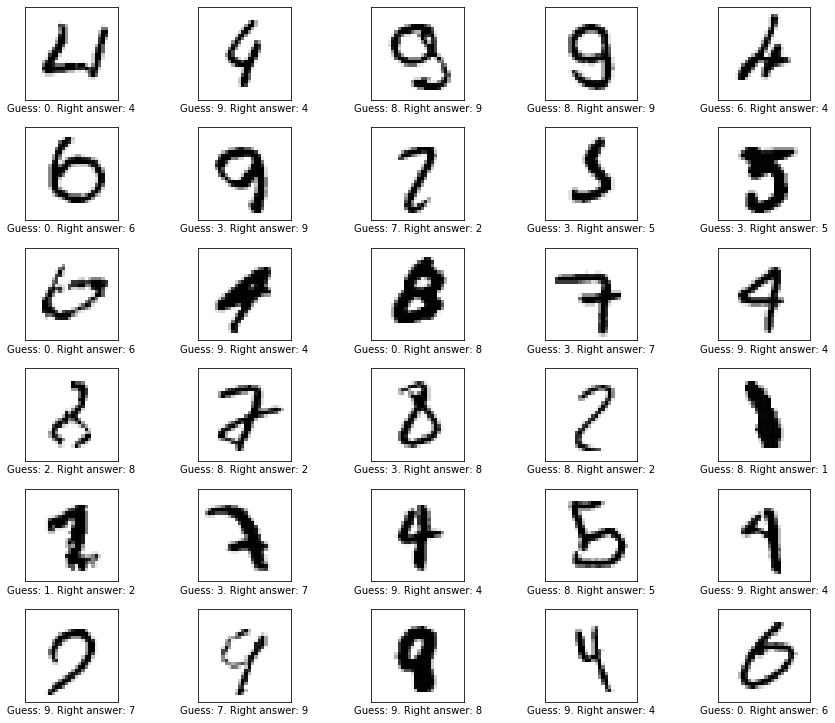

In [12]:
import numpy as np
full_preds = model.predict(X_test[:1000])
preds = np.argmax(full_preds, axis=1)
answers = np.argmax(y_test[:1000], axis=1)
wrong_preds = np.nonzero(preds != answers)
nwrong = len(wrong_preds[0])
nrows = nwrong // 5 + 1

# plot the data for these entries
plt.figure(figsize=(15, 15))
for i, idx in enumerate(wrong_preds[0]):
    plt.subplot(nrows, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx], cmap=plt.cm.binary)
    plt.xlabel("Guess: {:d}. Right answer: {:d}".format(np.argmax(full_preds[idx]),
                                                        np.argmax(y_test[idx])))

plt.subplots_adjust(hspace=0.3)
plt.show()

Depending on the specifics of your specific network (mostly driven by the initial random numbers that seed the network), you may find slightly more or fewer than 25 results. Take a look at the ones it got wrong, and try to understand why these entries in particular were not correctly classified. For some of them, you as a human may have had a hard time getting the answer right!

This concept gets at a deeper question and issue with ML networks: the network will always be imperfectly trained, not just because of the highly dimensional space we're working in with approximate optimization schemes, but in part due to the inherent quality of our training data. This result shows that having a high quality dataset with which to train can greatly improve the conclusions drawn by the network. It also shows that quantifying the uncertainty from ML predictions is important, and is actually an active area of research.

# Making Improvements
Now that we've done a first attempt at a neural network, try to make it more accurate. Play around with things like changing the number or size of hidden layers, or maybe using a different activation or loss function. There are a lot of degrees of freedom, so see which ones can matter. (Or not!)